<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/Descenso_de_gradiente_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green'>$\Large\text{II Webinar Farmacéutico Internacional de Bioquimioinformática}$</font>


---



---



$$\large\textbf{Método del Descenso por Gradiente}$$

$$\Large\textit{Cuaderno #2 | 12 setiembre del 2021}$$


_Jesus Alvarado-Huayhuaz_
___

<img src="https://miro.medium.com/max/493/1*6znQRQyo3cCAdS3XG-Pnlg.png" width="500" alt="Python logo"/>

* Algoritmo de optimización
* Casi todos los algoritmos de Machine Learning tienen un algoritmo de optimización
* Es un algoritmo que estima numéricamente dónde una función genera sus valores más bajos.
* Tamaño de los pasos tomados en cualquier dirección: __tasa de aprendizaje__
* La información de altura: __función de costo__
* La dirección de tus pasos: __Gradientes__

* Para una dependencia lineal se conoce el método analítico:
$$y = mx + b$$
    
<img src="https://miprofe.com/wp-content/uploads/2016/04/minimos-cuadrados7-e1460480353422-300x150.png" width="300" alt="Python logo"/>

* En términos del Aprendizaje Automático:
$$J(\theta) = \theta_0 + \theta_1x$$

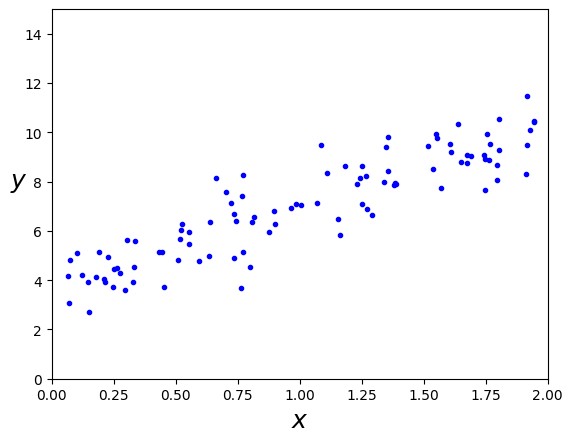

In [ ]:
#Ejemplo

import numpy as np
import random
import matplotlib.pyplot as plt

#Generación de números aleatorios
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X+np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [ ]:
# Estimacion analitica

X_b = np.c_[np.ones((100,1)),X]
theta_opt = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_opt)

[[3.72725593]
 [3.2539986 ]]


# Representación Matemática

* Al predecir cada uno de los puntos, el error se calcula:
$$e=\frac{1}{2m}\sum_{i=1}^{m}(h(x^{i})-y^{i})^{2}$$

* Entonces, el planteamiento del problema está dado por:
<img src="https://miro.medium.com/max/422/1*zGZwS27JjfCQG4TXV25XQQ.png" width="300" alt="Python logo"/>

* Donde $m$ = Número de observaciones

<img src="https://miro.medium.com/max/1838/1*DDjCOEPSHLsU7tff7LmYUQ.png" width="500" alt="Python logo"/>
<img src="https://qph.fs.quoracdn.net/main-qimg-a820f5e19a9393391572a73868f8ca1a" width="500" alt="Python logo"/>

### __Algoritmo del gradiente por descenso__

#### Funcion de coste
\begin{equation}
J(\theta)=\frac{1}{2N}\sum^{N}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2
\end{equation}

#### Hipotesis
\begin{equation}
h_{\theta}(x^{(i)})=\theta_0 +\theta_1 x^{(i)}
\end{equation}

#### Gradiente
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{N}\sum_{i=1}^{N}(h_{\theta}(x^{(i)} - y^{(i)})
\end{equation}

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{N}\sum_{i=1}^{N}(h_{\theta}(x^{(i)} - y^{(i)}).x^{(i)}
\end{equation}

#### Algoritmo GD
\begin{equation}
\theta := \theta -\alpha\frac{\partial J(\theta)}{\partial \theta}
\end{equation}

__Ejemplo__:
\begin{equation}
    min f(x)
\end{equation}
Donde:
\begin{equation}
    f(x) = x^2 - 4x
\end{equation}

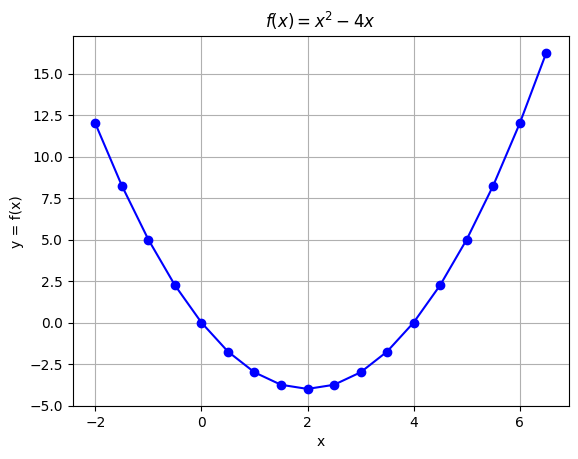

In [ ]:
x = np.arange(-2,7,0.5)
y = x**2 - 4*x

plt.title('$f(x) = x^2 - 4x$')
plt.plot(x,y,'b-o')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid()

Gradiente de la función $f$ es:
\begin{equation}
    \frac{\partial f(x)}{\partial x} = 2x - 4
\end{equation}

### __Implementación del Algoritmo__

In [ ]:
# @title Función gen_data
def gen_data(n, bias, varianza):
    # Función que genera datos aleatorios
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
    return x, y

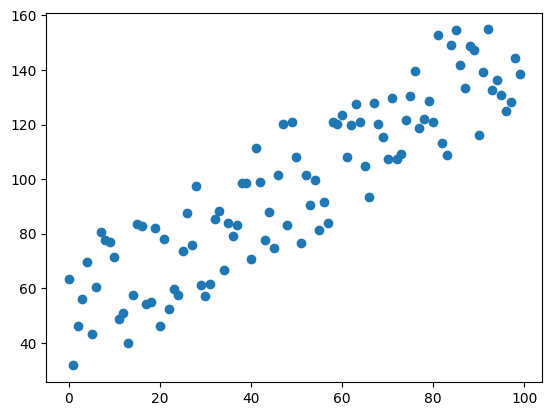

In [ ]:
# @title Data
x,y = gen_data(100, 25, 50)
plt.scatter(x, y)
plt.show()

* Como hay dos variables, debemos estimar:
    - \begin{equation}
    \displaystyle a := a-\alpha \frac{\partial }{\partial a}e(a,b)
    \end{equation}
    
    - \begin{equation} b := b-\alpha \frac{\partial }{\partial b}e(a,b) \end{equation}

* Al resolver las derivadas parciales:     
    - \begin{equation} \displaystyle a=a-\alpha \frac{1}{m}\sum_{i=1}^{m}(h(x^{i})-y^{i})^2 \end{equation}
    
    - \begin{equation} \displaystyle b=b-\alpha \frac{1}{m}\sum_{i=1}^{m}((h(x^{i})-y^{i})x^{i})^2 \end{equation}

In [ ]:
def coste(x, y, a, b): #theta1, theta0
    # Planteamiento de la funcion de coste
    m = len(x)
    error = 0.0
    for i in range(m):
        hipotesis = a+b*x[i]
        error +=  (y[i] - hipotesis) ** 2
    return error / (2*m)

In [ ]:
def descenso_gradiente(x, y, a, b, alpha, epochs):
    # Metodo del Descenso por Gradiente
    m = len(x)
    hist_coste = []
    for ep in range(epochs):
        b_deriv = 0
        a_deriv = 0
        for i in range(m):
            hipotesis = a+b*x[i]
            a_deriv += hipotesis - y[i]
            b_deriv += (hipotesis - y[i]) * x[i]
            hist_coste.append(coste(x, y, a, b))
        a -= (a_deriv / m) * alpha
        b -= (b_deriv / m) * alpha

    return a, b, hist_coste

#####Con 100 iteraciones

In [ ]:
# Solucion
a = 1
b = 1
alpha = 0.0001  # Valores típicos tasa de aprendizaje son 0.1, 0.001, etc.
iters = 100
a,b, hist_coste = descenso_gradiente(x, y, a, b, alpha, iters)
a,b

(1.134767584152903, 1.6944088753813005)

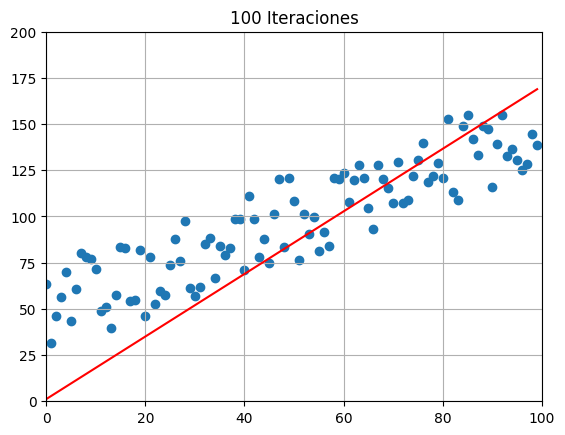

In [ ]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [a+b*0, a+b*max(x)]
plt.title('100 Iteraciones')
plt.axis([0, 100, 0, 200])
plt.plot(pred_x, pred_y, "r")
plt.grid()
plt.show()

#####Con 1000 iteraciones

In [ ]:
# Solucion
a = 1
b = 1
alpha = 0.0001  # Valores típicos son 0.1, 0.001, etc.
iters = 1000
a,b, hist_coste = descenso_gradiente(x, y, a, b, alpha, iters)
a,b

(2.2391232736463467, 1.6777590106373537)

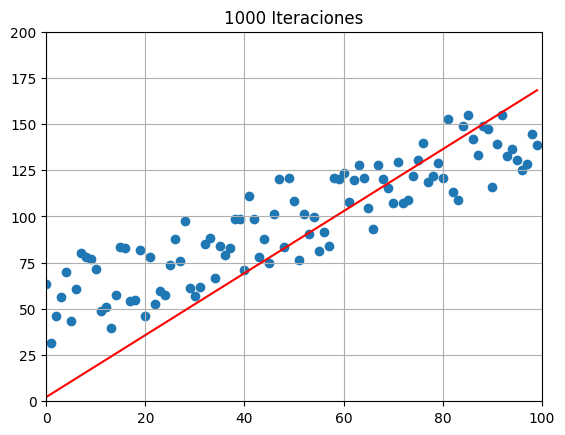

In [ ]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [a+b*0, a+b*max(x)]
plt.title('1000 Iteraciones')
plt.axis([0, 100, 0, 200])
plt.plot(pred_x, pred_y, "r")
plt.grid()
plt.show()

#####Con 10000 iteraciones

In [ ]:
# Solucion
a = 1
b = 1
alpha = 0.0001  # Valores típicos son 0.1, 0.001, etc.
iters = 10000
a,b, hist_coste = descenso_gradiente(x, y, a, b, alpha, iters)
a,b

(12.000255467919047, 1.5305948928367084)

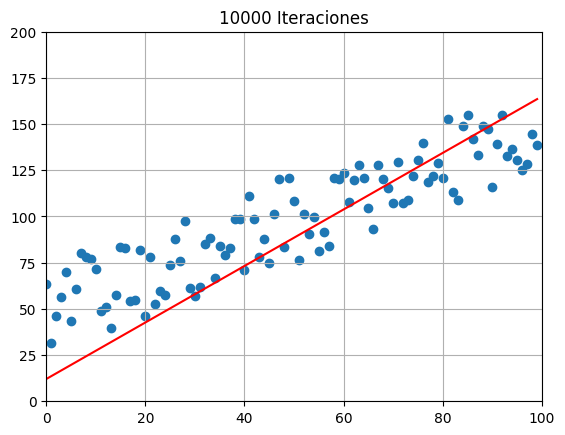

In [ ]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [a+b*0, a+b*max(x)]
plt.title('10000 Iteraciones')
plt.axis([0, 100, 0, 200])
plt.plot(pred_x, pred_y, "r")
plt.grid()
plt.show()

#### Predicción y error

In [ ]:
def pred(a, b, val):
    # INPUT:
    #    val: x
    # OUTPUT:
    #    y = a + b*x
    return a+b*val

In [ ]:
pred (a, b, 50)

88.53000010975447

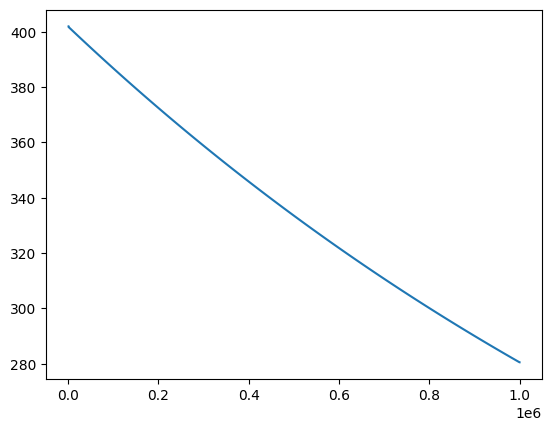

In [ ]:
x_base = range(len(hist_coste))
plt.plot(x_base[1000:], hist_coste[1000:])
plt.show()

<img src="https://3.bp.blogspot.com/-SNuFY04F_AA/XJpuoLbu_0I/AAAAAAAABrc/L8g6TSjEdXM2-n2_QFkluuwtL_8zzsc0QCLcBGAs/s1600/error.png" width="400" alt="Python logo"/>

### __Forma generalizada__
<img src="https://miro.medium.com/max/497/1*VwTuB8HQs5gzwotbUXZMQw.png" width="400" alt="Python logo"/>

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-12-16-03-53-e1615545306630.png" width="500" alt="Python logo"/>